<a href="https://colab.research.google.com/github/moiseyalaev/CNN-Research-/blob/main/CNN_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Networks on MNIST dataset

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, InputLayer, Activation, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

# Read in MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# Reform MNIST dataset
x_train  = x_train.reshape(60000, 28,28,1)
x_test   = x_test.reshape(10000, 28,28,1)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

# Build model
model = Sequential()
model.add(Conv2D(16,(2,2),padding = 'same', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
# final layer. Use softmax function to output a 10 by 1 array of floats that add up to 1
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

# Learning
epochs = 10
batch_size = 1024
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1)

# epochs: number of times we go through the entire 60000 dataset
# batch size: Divide the inputs used in one backward/forward pass into mini-batches. 
# making smaller mini batches increases accuracy but requires more computation


11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       18560     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 256)         0         
_________________________________________________________

In [ ]:
# Evaluate
score = model.evaluate(x_test, y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0206 - accuracy: 0.9928

Test loss: 0.02058406174182892
Test accuracy: 0.9927999973297119


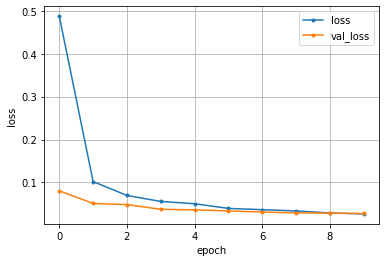

In [ ]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

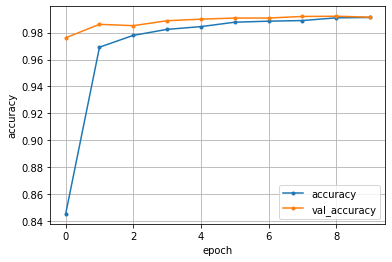

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), accuracy,     marker='.', label='accuracy')
plt.plot(range(nb_epoch), val_accuracy, marker='.', label='val_accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Visualization of the model's handling of images

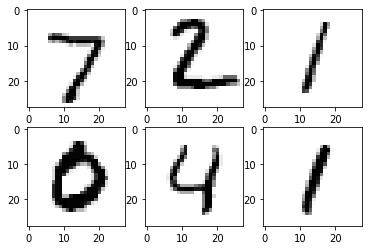

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import cm

example = x_test[0:6]

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(example[i].reshape(28, 28), cmap=cm.gray_r)

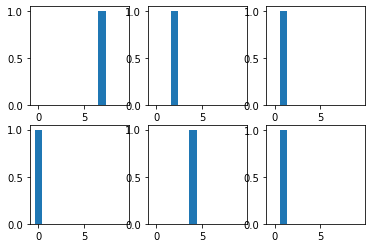

In [ ]:
predict = model.predict(example) # output after softmax function
digits = [0,1,2,3,4,5,6,7,8,9]
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.bar(digits, predict[i])

The feature maps of the first image in the testing dataset, after the first convolution and pooling layers.

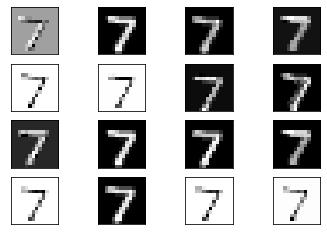

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
img = x_test[0]
img = img.reshape(-1,28,28,1)
feature_maps = model.predict(img)
square = 4
ix = 1


for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()